# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [21]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs X標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs Y轉成 onehot encoding
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [19]:
x_train.shape[-1]

3072

In [16]:
input_layer = keras.layers.Input([x_train.shape[-1]])
input_layer

<tf.Tensor 'input_2:0' shape=(None, 3072) dtype=float32>

In [29]:
#建立神經網路

def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128,128,128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    
    return model

In [45]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

In [47]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session()  #清除舊的 Graph
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)
    
    model.fit(x_train, y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test, y_test),
             shuffle=True)
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    print("exp_name_tag :", exp_name_tag)
    
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
        
    #print("results " , results,"\n")

Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
___________________________________________________

Epoch 49/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.3079 - acc: 0.0989 - val_loss: 2.3067 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.3083 - acc: 0.0982 - val_loss: 2.3199 - val_acc: 0.1000
exp_name_tag : exp-lr-0.1-optimizer-<class 'keras.optimizers.RMSprop'>
Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.Adagrad'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (

Epoch 46/50
50000/50000 [==============================] - 2s 48us/step - loss: 2.3068 - acc: 0.0983 - val_loss: 2.3085 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 2s 48us/step - loss: 2.3071 - acc: 0.1022 - val_loss: 2.3047 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 2s 48us/step - loss: 2.3068 - acc: 0.1008 - val_loss: 2.3087 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 2s 49us/step - loss: 2.3064 - acc: 0.1006 - val_loss: 2.3094 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 2s 48us/step - loss: 2.3065 - acc: 0.1006 - val_loss: 2.3046 - val_acc: 0.1000
exp_name_tag : exp-lr-0.1-optimizer-<class 'keras.optimizers.Adam'>
Experiment with LR = 0.010000, Optimizer = <class 'keras.optimizers.SGD'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer

Epoch 45/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.2485 - acc: 0.5565 - val_loss: 1.4155 - val_acc: 0.5013
Epoch 46/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.2354 - acc: 0.5600 - val_loss: 1.4649 - val_acc: 0.4820
Epoch 47/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.2308 - acc: 0.5630 - val_loss: 1.4920 - val_acc: 0.4786
Epoch 48/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.2267 - acc: 0.5640 - val_loss: 1.4391 - val_acc: 0.4899
Epoch 49/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.2165 - acc: 0.5679 - val_loss: 1.3450 - val_acc: 0.5189
Epoch 50/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.2071 - acc: 0.5707 - val_loss: 1.4032 - val_acc: 0.5056
exp_name_tag : exp-lr-0.01-optimizer-<class 'keras.optimizers.SGD'>
Experiment with LR = 0.010000, Optimizer = <class 'keras.optimizers.RMSprop'>
Model: "model_1"
_________

Epoch 44/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.7456 - acc: 0.3627 - val_loss: 1.7964 - val_acc: 0.3396
Epoch 45/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.7427 - acc: 0.3653 - val_loss: 1.8570 - val_acc: 0.3421
Epoch 46/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.7506 - acc: 0.3602 - val_loss: 1.8462 - val_acc: 0.3156
Epoch 47/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.7455 - acc: 0.3663 - val_loss: 1.7634 - val_acc: 0.3618
Epoch 48/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.7345 - acc: 0.3695 - val_loss: 1.7629 - val_acc: 0.3594
Epoch 49/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.7413 - acc: 0.3686 - val_loss: 1.7924 - val_acc: 0.3671
Epoch 50/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.7424 - acc: 0.3639 - val_loss: 1.7978 - val_acc: 0.3626
exp_name_tag : exp-lr-0.01-optimiz

Epoch 43/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.0326 - acc: 0.6374 - val_loss: 1.4038 - val_acc: 0.5249
Epoch 44/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.0213 - acc: 0.6420 - val_loss: 1.3816 - val_acc: 0.5291
Epoch 45/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.0074 - acc: 0.6452 - val_loss: 1.4043 - val_acc: 0.5225
Epoch 46/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.9994 - acc: 0.6503 - val_loss: 1.4725 - val_acc: 0.5073
Epoch 47/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.9937 - acc: 0.6530 - val_loss: 1.3855 - val_acc: 0.5281
Epoch 48/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.9824 - acc: 0.6567 - val_loss: 1.4645 - val_acc: 0.5062
Epoch 49/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.9752 - acc: 0.6588 - val_loss: 1.4538 - val_acc: 0.5094
Epoch 50/50
50000/50000 [=========

Epoch 42/50
50000/50000 [==============================] - 2s 48us/step - loss: 2.3031 - acc: 0.0994 - val_loss: 2.3029 - val_acc: 0.1000
Epoch 43/50
50000/50000 [==============================] - 2s 48us/step - loss: 2.3031 - acc: 0.0995 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 2s 48us/step - loss: 2.3032 - acc: 0.0987 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 2s 48us/step - loss: 2.3031 - acc: 0.0985 - val_loss: 2.3029 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 2s 48us/step - loss: 2.3032 - acc: 0.0981 - val_loss: 2.3029 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 2s 48us/step - loss: 2.3031 - acc: 0.0974 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 2s 48us/step - loss: 2.3032 - acc: 0.0995 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 49/50
50000/50000 [=========

Epoch 41/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.7133 - acc: 0.3959 - val_loss: 1.7152 - val_acc: 0.4013
Epoch 42/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.7083 - acc: 0.3960 - val_loss: 1.7074 - val_acc: 0.3950
Epoch 43/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.7035 - acc: 0.3987 - val_loss: 1.7043 - val_acc: 0.3965
Epoch 44/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.6987 - acc: 0.3997 - val_loss: 1.6971 - val_acc: 0.4019
Epoch 45/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.6939 - acc: 0.4019 - val_loss: 1.6944 - val_acc: 0.3992
Epoch 46/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.6894 - acc: 0.4019 - val_loss: 1.6918 - val_acc: 0.4024
Epoch 47/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.6851 - acc: 0.4048 - val_loss: 1.6881 - val_acc: 0.4080
Epoch 48/50
50000/50000 [=========

Epoch 40/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.9097 - acc: 0.6693 - val_loss: 1.7828 - val_acc: 0.4645
Epoch 41/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.8919 - acc: 0.6777 - val_loss: 1.8977 - val_acc: 0.4525
Epoch 42/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.8857 - acc: 0.6790 - val_loss: 1.9091 - val_acc: 0.4861
Epoch 43/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.8659 - acc: 0.6837 - val_loss: 1.8124 - val_acc: 0.4841
Epoch 44/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.8511 - acc: 0.6888 - val_loss: 1.9676 - val_acc: 0.4815
Epoch 45/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.8376 - acc: 0.6959 - val_loss: 2.0366 - val_acc: 0.4857
Epoch 46/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.8281 - acc: 0.6983 - val_loss: 1.8481 - val_acc: 0.4803
Epoch 47/50
50000/50000 [=========

Epoch 39/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.2910 - acc: 0.5450 - val_loss: 1.3856 - val_acc: 0.5117
Epoch 40/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.2865 - acc: 0.5468 - val_loss: 1.4647 - val_acc: 0.4772
Epoch 41/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.2828 - acc: 0.5489 - val_loss: 1.4012 - val_acc: 0.5065
Epoch 42/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.2771 - acc: 0.5510 - val_loss: 1.3955 - val_acc: 0.5106
Epoch 43/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.2726 - acc: 0.5514 - val_loss: 1.3945 - val_acc: 0.5099
Epoch 44/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.2683 - acc: 0.5529 - val_loss: 1.3984 - val_acc: 0.5064
Epoch 45/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.2635 - acc: 0.5550 - val_loss: 1.3706 - val_acc: 0.5132
Epoch 46/50
50000/50000 [=========

Epoch 38/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.7864 - acc: 0.7175 - val_loss: 1.6556 - val_acc: 0.5039
Epoch 39/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.7782 - acc: 0.7197 - val_loss: 1.6509 - val_acc: 0.5146
Epoch 40/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.7662 - acc: 0.7224 - val_loss: 1.6516 - val_acc: 0.5160
Epoch 41/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.7193 - acc: 0.7413 - val_loss: 1.7356 - val_acc: 0.5179
Epoch 42/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.7321 - acc: 0.7354 - val_loss: 1.7049 - val_acc: 0.5112
Epoch 43/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.7084 - acc: 0.7435 - val_loss: 1.7830 - val_acc: 0.5171
Epoch 44/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.6918 - acc: 0.7489 - val_loss: 1.8141 - val_acc: 0.5076
Epoch 45/50
50000/50000 [=========

Epoch 37/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.2050 - acc: 0.2243 - val_loss: 2.2037 - val_acc: 0.2259
Epoch 38/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.2016 - acc: 0.2252 - val_loss: 2.2003 - val_acc: 0.2257
Epoch 39/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.1983 - acc: 0.2257 - val_loss: 2.1969 - val_acc: 0.2283
Epoch 40/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1949 - acc: 0.2263 - val_loss: 2.1936 - val_acc: 0.2273
Epoch 41/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.1916 - acc: 0.2272 - val_loss: 2.1902 - val_acc: 0.2269
Epoch 42/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.1882 - acc: 0.2274 - val_loss: 2.1868 - val_acc: 0.2290
Epoch 43/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.1849 - acc: 0.2285 - val_loss: 2.1834 - val_acc: 0.2291
Epoch 44/50
50000/50000 [=========

Epoch 36/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.0880 - acc: 0.6168 - val_loss: 1.4493 - val_acc: 0.4968
Epoch 37/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.0744 - acc: 0.6220 - val_loss: 1.4167 - val_acc: 0.5132
Epoch 38/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.0558 - acc: 0.6274 - val_loss: 1.3621 - val_acc: 0.5263
Epoch 39/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.0500 - acc: 0.6308 - val_loss: 1.4835 - val_acc: 0.4791
Epoch 40/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.0389 - acc: 0.6334 - val_loss: 1.3891 - val_acc: 0.5202
Epoch 41/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.0232 - acc: 0.6401 - val_loss: 1.3652 - val_acc: 0.5300
Epoch 42/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.0099 - acc: 0.6463 - val_loss: 1.4372 - val_acc: 0.5128
Epoch 43/50
50000/50000 [=========

Epoch 33/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.0002 - acc: 0.6462 - val_loss: 1.3619 - val_acc: 0.5298
Epoch 34/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.9782 - acc: 0.6553 - val_loss: 1.3910 - val_acc: 0.5204
Epoch 35/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.9624 - acc: 0.6605 - val_loss: 1.3607 - val_acc: 0.5341
Epoch 36/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.9568 - acc: 0.6636 - val_loss: 1.3466 - val_acc: 0.5398
Epoch 37/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.9432 - acc: 0.6684 - val_loss: 1.3555 - val_acc: 0.5339
Epoch 38/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.9313 - acc: 0.6712 - val_loss: 1.3787 - val_acc: 0.5411
Epoch 39/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.9153 - acc: 0.6771 - val_loss: 1.3606 - val_acc: 0.5396
Epoch 40/50
50000/50000 [=========

Epoch 32/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.2975 - acc: 0.1329 - val_loss: 2.2970 - val_acc: 0.1339
Epoch 33/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.2971 - acc: 0.1341 - val_loss: 2.2965 - val_acc: 0.1347
Epoch 34/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.2966 - acc: 0.1352 - val_loss: 2.2960 - val_acc: 0.1360
Epoch 35/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.2962 - acc: 0.1360 - val_loss: 2.2956 - val_acc: 0.1377
Epoch 36/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.2957 - acc: 0.1369 - val_loss: 2.2951 - val_acc: 0.1383
Epoch 37/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.2953 - acc: 0.1383 - val_loss: 2.2947 - val_acc: 0.1385
Epoch 38/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.2949 - acc: 0.1393 - val_loss: 2.2943 - val_acc: 0.1394
Epoch 39/50
50000/50000 [=========

Epoch 31/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5089 - acc: 0.4711 - val_loss: 1.5323 - val_acc: 0.4584
Epoch 32/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5024 - acc: 0.4729 - val_loss: 1.5255 - val_acc: 0.4634
Epoch 33/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4962 - acc: 0.4759 - val_loss: 1.5371 - val_acc: 0.4582
Epoch 34/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4894 - acc: 0.4773 - val_loss: 1.5239 - val_acc: 0.4646
Epoch 35/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4838 - acc: 0.4795 - val_loss: 1.5218 - val_acc: 0.4572
Epoch 36/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4779 - acc: 0.4817 - val_loss: 1.5227 - val_acc: 0.4643
Epoch 37/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4722 - acc: 0.4833 - val_loss: 1.5233 - val_acc: 0.4594
Epoch 38/50
50000/50000 [=========

Epoch 30/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.1113 - acc: 0.2701 - val_loss: 2.1100 - val_acc: 0.2740
Epoch 31/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.1087 - acc: 0.2713 - val_loss: 2.1075 - val_acc: 0.2751
Epoch 32/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.1062 - acc: 0.2714 - val_loss: 2.1050 - val_acc: 0.2762
Epoch 33/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.1038 - acc: 0.2720 - val_loss: 2.1025 - val_acc: 0.2764
Epoch 34/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.1014 - acc: 0.2729 - val_loss: 2.1002 - val_acc: 0.2760
Epoch 35/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.0990 - acc: 0.2736 - val_loss: 2.0978 - val_acc: 0.2771
Epoch 36/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.0967 - acc: 0.2743 - val_loss: 2.0955 - val_acc: 0.2769
Epoch 37/50
50000/50000 [=========

Epoch 29/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4757 - acc: 0.4832 - val_loss: 1.5050 - val_acc: 0.4696
Epoch 30/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4701 - acc: 0.4848 - val_loss: 1.5091 - val_acc: 0.4713
Epoch 31/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4633 - acc: 0.4892 - val_loss: 1.4951 - val_acc: 0.4698
Epoch 32/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.4557 - acc: 0.4904 - val_loss: 1.4933 - val_acc: 0.4728
Epoch 33/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4495 - acc: 0.4927 - val_loss: 1.4823 - val_acc: 0.4743
Epoch 34/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4433 - acc: 0.4951 - val_loss: 1.4854 - val_acc: 0.4774
Epoch 35/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4392 - acc: 0.4969 - val_loss: 1.4791 - val_acc: 0.4775
Epoch 36/50
50000/50000 [=========

In [49]:
len(results.keys())

20

In [51]:
results.keys()

dict_keys(["exp-lr-0.1-optimizer-<class 'keras.optimizers.SGD'>", "exp-lr-0.1-optimizer-<class 'keras.optimizers.RMSprop'>", "exp-lr-0.1-optimizer-<class 'keras.optimizers.Adagrad'>", "exp-lr-0.1-optimizer-<class 'keras.optimizers.Adam'>", "exp-lr-0.01-optimizer-<class 'keras.optimizers.SGD'>", "exp-lr-0.01-optimizer-<class 'keras.optimizers.RMSprop'>", "exp-lr-0.01-optimizer-<class 'keras.optimizers.Adagrad'>", "exp-lr-0.01-optimizer-<class 'keras.optimizers.Adam'>", "exp-lr-0.001-optimizer-<class 'keras.optimizers.SGD'>", "exp-lr-0.001-optimizer-<class 'keras.optimizers.RMSprop'>", "exp-lr-0.001-optimizer-<class 'keras.optimizers.Adagrad'>", "exp-lr-0.001-optimizer-<class 'keras.optimizers.Adam'>", "exp-lr-0.0001-optimizer-<class 'keras.optimizers.SGD'>", "exp-lr-0.0001-optimizer-<class 'keras.optimizers.RMSprop'>", "exp-lr-0.0001-optimizer-<class 'keras.optimizers.Adagrad'>", "exp-lr-0.0001-optimizer-<class 'keras.optimizers.Adam'>", "exp-lr-1e-05-optimizer-<class 'keras.optimizers.

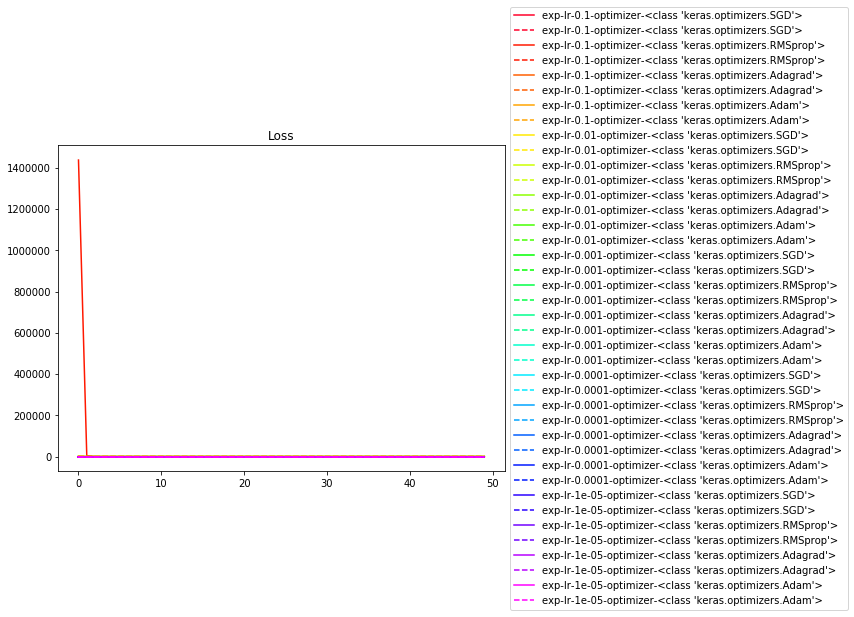

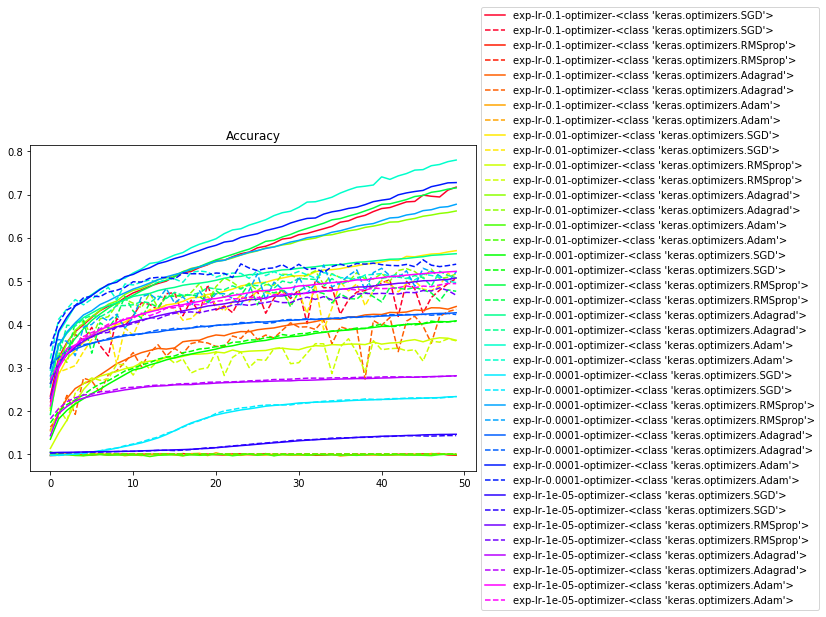

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()